<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [200]:
train_pd= pd.read_csv("train.csv")
test_pd= pd.read_csv("test.csv")

## EDA

In [201]:
train_pd.shape

(891, 12)

In [202]:
train_pd.isnull().sum() / train_pd.shape[0] * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [203]:
train_pd.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [223]:
train_pd

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,22,1,0,7.2500,0,1,0,0,1,2,0
1,1,1,38,1,0,71.2833,1,0,1,0,0,2,0
2,1,3,26,0,0,7.9250,1,0,0,0,1,1,1
3,1,1,35,1,0,53.1000,1,0,0,0,1,2,0
4,0,3,35,0,0,8.0500,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0,1,0,0,1,1,1
887,1,1,19,0,0,30.0000,1,0,0,0,1,1,1
888,0,3,29,1,2,23.4500,1,0,0,0,1,4,0
889,1,1,26,0,0,30.0000,0,1,1,0,0,1,1


## Data Preprocessing

In [205]:
train_pd = train_pd.drop(["Cabin","Name","PassengerId"], axis=1)

In [206]:
train_pd["Age"] = train_pd["Age"].fillna(train_pd["Age"].mean())


In [207]:
train_pd.Embarked.dropna(inplace=True)

In [208]:
train_pd = pd.get_dummies(train_pd, columns=["Sex"], drop_first=False)



In [209]:
train_pd = pd.get_dummies(train_pd, columns=["Embarked"], drop_first=False)

In [210]:
bool_cols = ["Sex_female","Age", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]
train_pd[bool_cols] = train_pd[bool_cols].astype(int)



In [211]:
train_pd.drop(columns=["Ticket"], inplace=True)


In [212]:
train_pd["FamilySize"] = train_pd["SibSp"] + train_pd["Parch"] + 1


In [213]:
train_pd["IsAlone"] = (train_pd["FamilySize"] == 1).astype(int)


## Strorytelling - Visualization

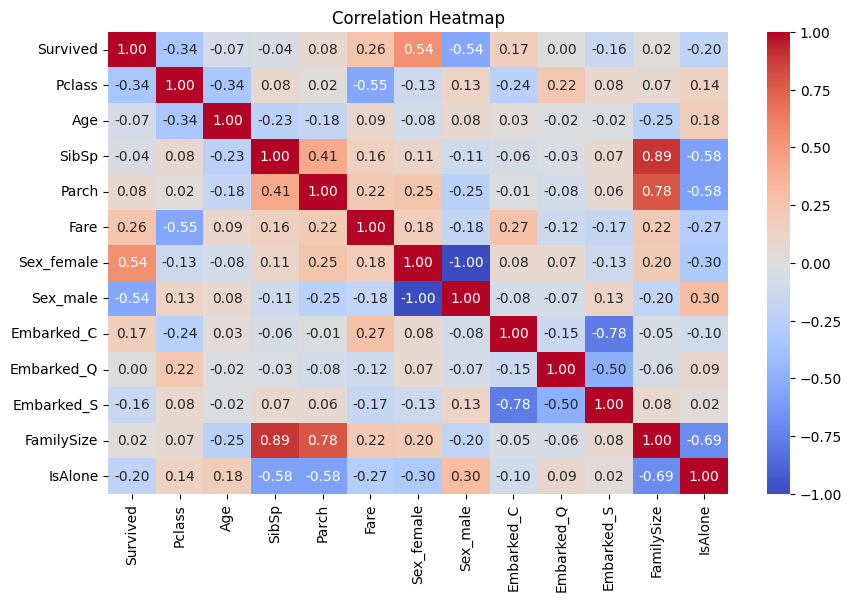

In [214]:
corr = train_pd.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Splitting Data

In [228]:
from sklearn.model_selection import train_test_split

x_train = train_pd.drop(columns=["Survived"])
y_train = train_pd["Survived"]



In [216]:
test_pd = test_pd.drop(["Cabin","Name","PassengerId"], axis=1)
test_pd["Age"] = test_pd["Age"].fillna(test_pd["Age"].mean())
test_pd.Embarked.dropna(inplace=True)
test_pd = pd.get_dummies(test_pd, columns=["Sex"], drop_first=False)
test_pd = pd.get_dummies(test_pd, columns=["Embarked"], drop_first=False)
bool_cols = ["Sex_female","Age", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]
test_pd[bool_cols] = test_pd[bool_cols].astype(int)
test_pd.drop(columns=["Ticket"], inplace=True)
test_pd["FamilySize"] = test_pd["SibSp"] + test_pd["Parch"] + 1
test_pd["IsAlone"] = (test_pd["FamilySize"] == 1).astype(int)


x_test = test_pd



In [217]:
y_test = pd.read_csv("sampleSubmission.csv")

In [218]:
y_test = y_test["Survived"]
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


## Train your model (Classification)

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [235]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# List of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(x_train, y_train)      # train
    y_pred = model.predict(x_test)   # predict

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Decision Tree ===
Accuracy: 0.7679
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       266
           1       0.68      0.69      0.68       152

    accuracy                           0.77       418
   macro avg       0.75      0.75      0.75       418
weighted avg       0.77      0.77      0.77       418

Confusion Matrix:
[[216  50]
 [ 47 105]]

=== Random Forest ===
Accuracy: 0.8062
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       266
           1       0.74      0.71      0.73       152

    accuracy                           0.81       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.80      0.81      0.81       418

Confusion Matrix:
[[229  37]
 [ 44 108]]

=== XGBoost ===
Accuracy: 0.8182
Classification Report:
              precision    recall  f1-score   support

           0       0.84   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
